## Step-1 Importing Dataset

In [16]:
import cv2,os

# Path where the Dataset is present 
dataPath='F:\DE\dataset-20201025T111149Z-001\dataset'

# Storing the Dataset in categories(with mask & withoutmask)
categories=os.listdir(dataPath)
print(categories)

# Cerating the labels for different categories
labels=[i for i in range(len(categories))]
print(labels)

# Labeling the images -> with mask=0 & without mask=1
label_dict=dict(zip(categories,labels))
print(label_dict)


['with mask', 'without mask']
[0, 1]
{'with mask': 0, 'without mask': 1}


## Step-2 Preprocessing the Dataset

Image with Mask:


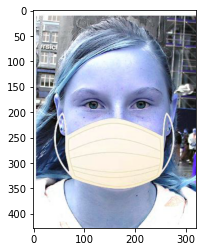

Image withour Mask:


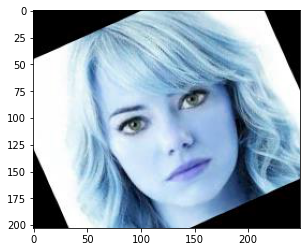

Example of Image_data & targe:
Image:  [[51 52 64 ... 85  9 33]
 [51 55 62 ... 20 60 40]
 [54 52 48 ... 71 52  3]
 ...
 [74 77 70 ... 14  5 51]
 [64 68 74 ...  5 12  9]
 [60 60 56 ... 15 15 15]] 
Target: 0

Total no of Images: 1376
Total no of targets: 1376


In [17]:
import matplotlib.pyplot as plt
images_list=[]

# Declaring the size of image for input as [100 X 100]
size_of_image=100

# Image Data
image_data=[]

# Label array 
target=[]

for category in categories:
    
    # Path of one category Eg:- F:\DE\dataset-20201025T111149Z-001\dataset\with mask
    folder_path=os.path.join(dataPath,category)
    
    # Storing All the images in this list
    images=os.listdir(folder_path)
    
    for image in images:
        
        # Path of one Image Eg:- F:\DE\dataset-20201025T111149Z-001\dataset\with mask\img1
        image_path=os.path.join(folder_path,image)
        
        # Reading the image using openCV
        img=cv2.imread(image_path)
        images_list.append(img)
        
        # Converting An Image in Gray Scale
        gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        # Resizing the Gray Scale Image to [100 X 100]
        resized_image=cv2.resize(gray_image,(size_of_image,size_of_image))
        
        # Inserting the Resized-Gray-Scaled image into "image_data" list
        image_data.append(resized_image)
        
        # Inserting the label of an image into "target" list
        target.append(label_dict[category])


print("Image with Mask:")        
plt.imshow(images_list[3])
plt.show()

print("Image withour Mask:")
plt.imshow(images_list[1210])
plt.show()

        
print("Example of Image_data & targe:")
print("Image: ",image_data[0],"\nTarget:",target[0])

print("\nTotal no of Images:",len(image_data))
print("Total no of targets:",len(target))


In [18]:
import numpy as np
import keras

# Normalizing The images
image_data = np.array(image_data)/255.0

# Now Converting the shape of an image into (100,100,1)
image_data=np.reshape(image_data,(image_data.shape[0],size_of_image,size_of_image,1))

# Converting the list into an array
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [19]:
# Saving the image_data & new_target
np.save('image_data',image_data)
np.save('target',new_target)

## Training The CNN Model

In [20]:
import numpy as np

# Loading back the saved numpy arrays 
image_data=np.load('image_data.npy')
target=np.load('target.npy')


In [21]:
import tensorflow as tf

model=tf.keras.Sequential([
    
    # CNN-Layer 1 :- Cov2D->ReLU->MaxPool
    tf.keras.layers.Conv2D(200,(3,3),input_shape=image_data.shape[1:]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # CNN-Layer 2 :- Cov2D->ReLU->MaxPool
    tf.keras.layers.Conv2D(100,(3,3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # CNN-Layer 2 :- Cov2D->ReLU->MaxPool
    tf.keras.layers.Conv2D(50,(3,3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # Flatte layer after the convolution layer
    tf.keras.layers.Flatten(),
    
    # Applying Dropout Regurlarization to Avoid "Over-Fitting"
    tf.keras.layers.Dropout(0.5),
    
    # Final Dense Layer
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(image_data,target,test_size=0.1)

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.973):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[callbacks],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 31s 32ms/sample - loss: 0.6932 - acc: 0.5131 - val_loss: 0.6805 - val_acc: 0.5282
Epoch 2/20
990/990 [==============================] - 33s 33ms/sample - loss: 0.6082 - acc: 0.6717 - val_loss: 0.5131 - val_acc: 0.7298
Epoch 3/20
990/990 [==============================] - 33s 33ms/sample - loss: 0.3529 - acc: 0.8596 - val_loss: 0.2675 - val_acc: 0.8831
Epoch 4/20
990/990 [==============================] - 32s 32ms/sample - loss: 0.2375 - acc: 0.9131 - val_loss: 0.1850 - val_acc: 0.9234
Epoch 5/20
990/990 [==============================] - 31s 32ms/sample - loss: 0.1968 - acc: 0.9232 - val_loss: 0.1629 - val_acc: 0.9395
Epoch 6/20
990/990 [==============================] - 31s 32ms/sample - loss: 0.1273 - acc: 0.9545 - val_loss: 0.1912 - val_acc: 0.9113
Epoch 7/20
990/990 [==============================] - 31s 31ms/sample - loss: 0.0965 - acc: 0.9646 - val_loss: 0.0961 - val_acc: 0.9677
Ep

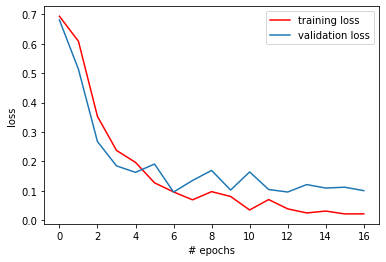

In [24]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 1s 8ms/sample - loss: 0.0889 - acc: 0.9855
[0.0888965292091387, 0.98550725]


## Now Detecting The Mask

In [35]:
from keras.models import load_model
import cv2
import numpy as np

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [36]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+h,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        print(result)
        if(result[0][1]>0.5):
            label=1
        else:
            label=0
        print(label)
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

[[0.00110586 0.99889416]]
1
[[0.00111948 0.99888057]]
1
[[0.00107348 0.99892646]]
1
[[0.00101366 0.9989863 ]]
1
[[9.988025e-04 9.990012e-01]]
1
[[9.9221314e-04 9.9900776e-01]]
1
[[0.00101694 0.9989831 ]]
1
[[0.00105148 0.9989485 ]]
1
[[0.00106176 0.99893826]]
1
[[0.00103371 0.99896634]]
1
[[0.0010616 0.9989384]]
1
[[0.00106991 0.99893004]]
1
[[0.00111498 0.998885  ]]
1
[[0.00109359 0.9989064 ]]
1
[[0.00115874 0.99884135]]
1
[[0.00118215 0.99881786]]
1
[[0.0011326 0.9988674]]
1
[[0.00110987 0.9988901 ]]
1
[[0.00116704 0.998833  ]]
1
[[0.00110572 0.9988943 ]]
1
[[0.00109138 0.99890864]]
1
[[0.00106837 0.9989316 ]]
1
[[0.00105863 0.99894136]]
1
[[0.00100083 0.9989992 ]]
1
[[0.00113626 0.9988638 ]]
1
[[9.5135794e-04 9.9904865e-01]]
1
[[9.52960e-04 9.99047e-01]]
1
[[9.921248e-04 9.990079e-01]]
1
[[9.417556e-04 9.990583e-01]]
1
[[9.4569381e-04 9.9905425e-01]]
1
[[0.00103562 0.9989644 ]]
1
[[0.0010066  0.99899346]]
1
[[0.00100128 0.9989987 ]]
1
[[0.00108245 0.9989176 ]]
1
[[0.00107047 0.99892

[[0.00112709 0.99887294]]
1
[[0.00111327 0.99888676]]
1
[[0.00106935 0.99893063]]
1
[[0.00119363 0.99880636]]
1
[[0.00122239 0.99877757]]
1
[[0.0011323  0.99886775]]
1
[[0.00114008 0.9988599 ]]
1
[[0.00108471 0.9989153 ]]
1
[[0.00113995 0.99886   ]]
1
[[0.00119447 0.9988055 ]]
1
[[0.00115641 0.99884355]]
1
[[0.00114609 0.9988539 ]]
1
[[0.0011752 0.9988248]]
1
[[0.00119489 0.99880517]]
1
[[0.00118239 0.9988176 ]]
1
[[0.00117809 0.9988219 ]]
1
[[0.00115529 0.9988446 ]]
1
[[0.00122864 0.99877137]]
1
[[0.00115975 0.9988403 ]]
1
[[0.00120757 0.9987924 ]]
1
[[0.00124983 0.9987502 ]]
1
[[0.00122293 0.9987771 ]]
1
[[0.00118681 0.99881315]]
1
[[0.0012067  0.99879324]]
1
[[0.00116447 0.9988355 ]]
1
[[0.00117372 0.9988263 ]]
1
[[0.00114188 0.9988581 ]]
1
[[0.00113719 0.99886286]]
1
[[0.00116274 0.9988373 ]]
1
[[0.00117111 0.99882895]]
1
[[0.00110891 0.99889106]]
1
[[0.00110791 0.9988921 ]]
1
[[0.00118289 0.9988171 ]]
1
[[0.001181   0.99881893]]
1
[[0.00111155 0.99888843]]
1
[[0.00115462 0.9988453

[[0.00123267 0.9987674 ]]
1
[[0.0011705  0.99882954]]
1
[[0.00122548 0.99877447]]
1
[[0.00124889 0.99875104]]
1
[[0.00122143 0.9987785 ]]
1
[[0.00118853 0.9988115 ]]
1
[[0.0012337 0.9987663]]
1
[[0.0012128 0.9987872]]
1
[[0.0012156  0.99878436]]
1
[[0.00114083 0.99885917]]
1
[[0.00116192 0.9988381 ]]
1
[[0.0011344 0.9988656]]
1
[[0.00115866 0.99884135]]
1
[[0.00118406 0.998816  ]]
1
[[0.00116412 0.99883586]]
1
[[0.0011114 0.9988887]]
1
[[0.00115973 0.9988403 ]]
1
[[0.00119579 0.9988042 ]]
1
[[0.00114037 0.99885964]]
1
[[0.00111349 0.9988865 ]]
1
[[0.0012374 0.9987626]]
1
[[0.00119311 0.99880695]]
1
[[0.00120956 0.99879044]]
1
[[0.0012083  0.99879175]]
1
[[0.00122417 0.9987758 ]]
1
[[0.00114076 0.9988593 ]]
1
[[0.00116631 0.9988337 ]]
1
[[0.0011988  0.99880123]]
1
[[0.00120359 0.99879634]]
1
[[0.0011696 0.9988304]]
1
[[0.00117865 0.9988213 ]]
1
[[0.00112261 0.99887735]]
1
[[0.00109455 0.9989054 ]]
1
[[0.00117464 0.9988254 ]]
1
[[0.0011348  0.99886525]]
1
[[0.00119486 0.99880517]]
1
[[0.